In [39]:
'''
Step 01 : Importing the libraries
Step 02 : Read the data
Step 03 : Check the shape of the data
Step 04 : View the samples
Step 05 : Basic EDA
Step 06 : TO check the null values
Step 07 : Data Preprocessing - Converting categorical into numerical.
Step 08 : Train Test Split
Step 09 : Training the model
step 10 : Testing the model
step 11 : Calculating the mean squared error loss and accuarcy (R2 Score)
'''

'\nStep 01 : Importing the libraries\nStep 02 : Read the data\nStep 03 : Check the shape of the data\nStep 04 : View the samples\nStep 05 : Basic EDA\nStep 06 : TO check the null values\nStep 07 : Data Preprocessing - Converting categorical into numerical.\nStep 08 : Train Test Split\nStep 09 : Training the model\nstep 10 : Testing the model\nstep 11 : Calculating the mean squared error loss and accuarcy (R2 Score)\n'

## Importing the libraries

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

plt.rcParams['figure.figsize'] = [8,5]

## Data Read

In [41]:
df = pd.read_csv('/kaggle/input/advertisingcsv/Advertising.csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [42]:
df.shape

(200, 5)

In [43]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


<Axes: xlabel='Sales', ylabel='Count'>

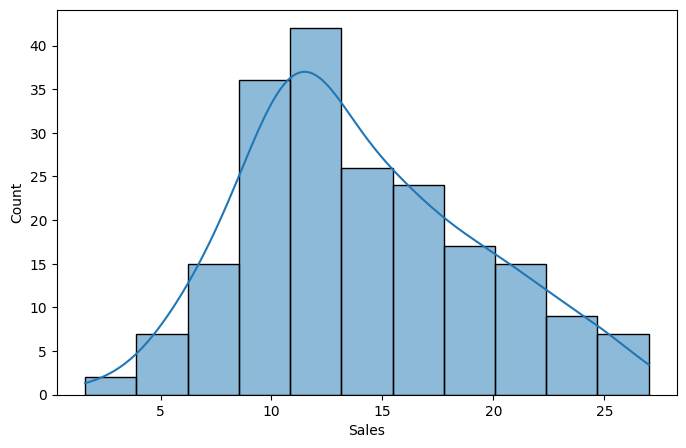

In [44]:
sns.histplot(df['Sales'],kde=True)

<Axes: >

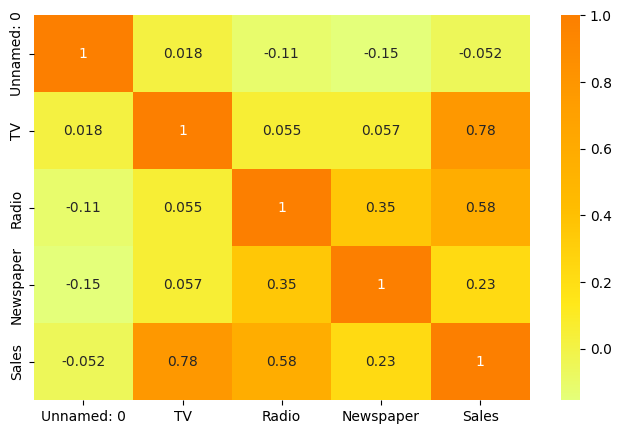

In [45]:
corr = df.corr()
sns.heatmap(corr,cmap='Wistia',annot=True)

### TV and Sales

**Conclusion**
- As the money spent varies, Sales varies. It means as the money spent in advertising on TV increases, the Sales also increases. 

Text(0.5, 1.0, 'TV vs Sales')

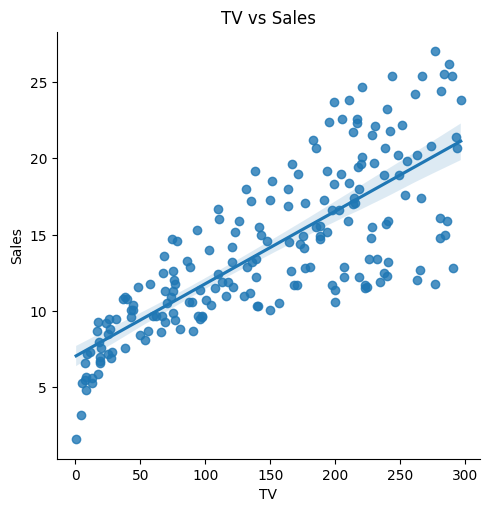

In [46]:
# Plot Tv and Sales
sns.lmplot(x='TV',y='Sales',data=df)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('TV vs Sales')

### Radio and Sales

**Conclusion**
- As the money spent varies, Sales varies. It means as the money spent in advertising on Radio increases, the Sales also increases.


Text(0.5, 1.0, 'Radio vs Sales')

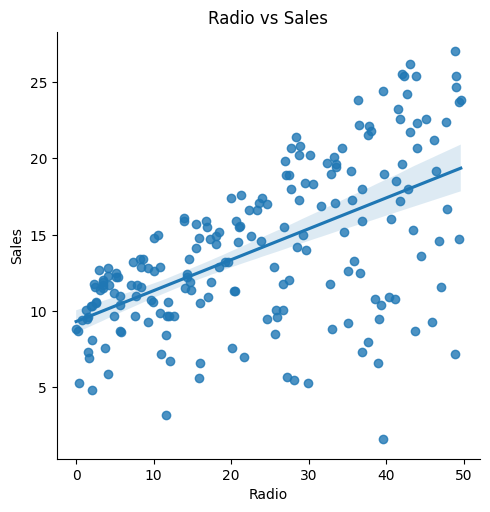

In [47]:
sns.lmplot(x='Radio',y='Sales',data=df)
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Radio vs Sales')

### Newspaper and Sales

**Conclusion**
- As 

Text(0.5, 1.0, 'Newspaper vs Sales')

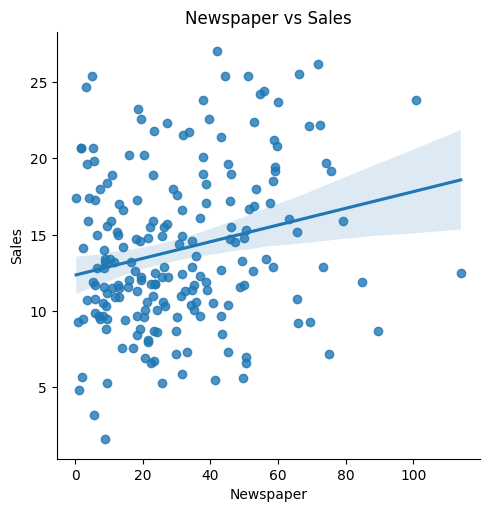

In [48]:
sns.lmplot(x='Newspaper',y='Sales',data=df)
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.title('Newspaper vs Sales')

In [49]:
df = df.drop(['Unnamed: 0'],axis=1)

In [50]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [51]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## Data Preprocessing - Encoding
- Here, encoding is not required because there are no categorical columns

In [52]:
X = df.drop(['Sales'],axis=1)
Y = df['Sales']

## Train Test Split

In [53]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=24)

## Training the model

In [54]:
lin_reg = LinearRegression()

In [55]:
lin_reg.fit(X_train,Y_train)

LinearRegression()

In [56]:
lin_reg.coef_

array([ 0.04528623,  0.19117773, -0.0021325 ])

In [57]:
lin_reg.intercept_

3.027422768256036

## Test the Model

In [58]:
Y_pred = lin_reg.predict(X_test)

In [59]:
Y_pred

array([12.80739091, 19.72447895, 23.17484451,  9.17704774, 16.23065124,
        8.21288354,  9.19646848, 12.66126533, 12.43550539, 19.27931608,
       10.50880175,  4.53900307, 18.46199527, 15.56071169, 10.13043451,
       17.60188481, 15.07346354, 21.18017654, 20.39612812, 20.52673418,
        7.72145285, 14.55649319, 14.22650194,  9.68960095, 15.16393318,
       20.8445975 , 18.52917937, 13.59709848, 24.11927229, 17.33011259,
       20.81999087, 15.48834012,  8.96813715, 10.66609243, 14.59220082,
       10.59860919, 13.64748346,  7.47015809, 17.08522562, 15.44235282,
       12.61006654, 15.54576874, 11.98369028, 17.12961132,  3.64255146,
       13.7211495 , 14.37154214, 13.90269773,  9.70343355,  9.4017898 ,
       12.01051594,  5.41860278, 12.8518292 , 19.01230463, 17.17103975,
       21.21354601, 12.43362158, 21.78601473, 13.3192668 , 16.40014207])

In [60]:
mean_squared_error(Y_pred,Y_test)

2.4528557242618185

## R2 Square

In [61]:
lin_reg.score(X_test,Y_test)

0.9012086772570745

In [62]:
lin_reg.score(X_test,Y_test)*100

90.12086772570746